# Modeling Nonlinear Relationships
**by. 18012635 양원석(Wonseok Yang)**

---


## 1. Loading data from URL (Previous practice)
**pandas.read_csv(filepath_or_buffer, header='infer', sep=‘,’)**

In [ ]:
import pandas as pd

# Load housing data from URL to a DataFrame
url = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt"
df = pd.read_csv(filepath_or_buffer=url, header=None, sep="\s+")

# Assign the column names
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Have a look at the data shape and entries
# Showing the first 5 rows with .head()
# Remove .head() to show all the entries
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 2. Feature selection


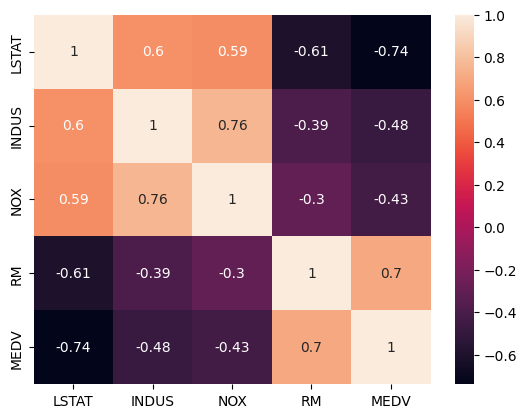

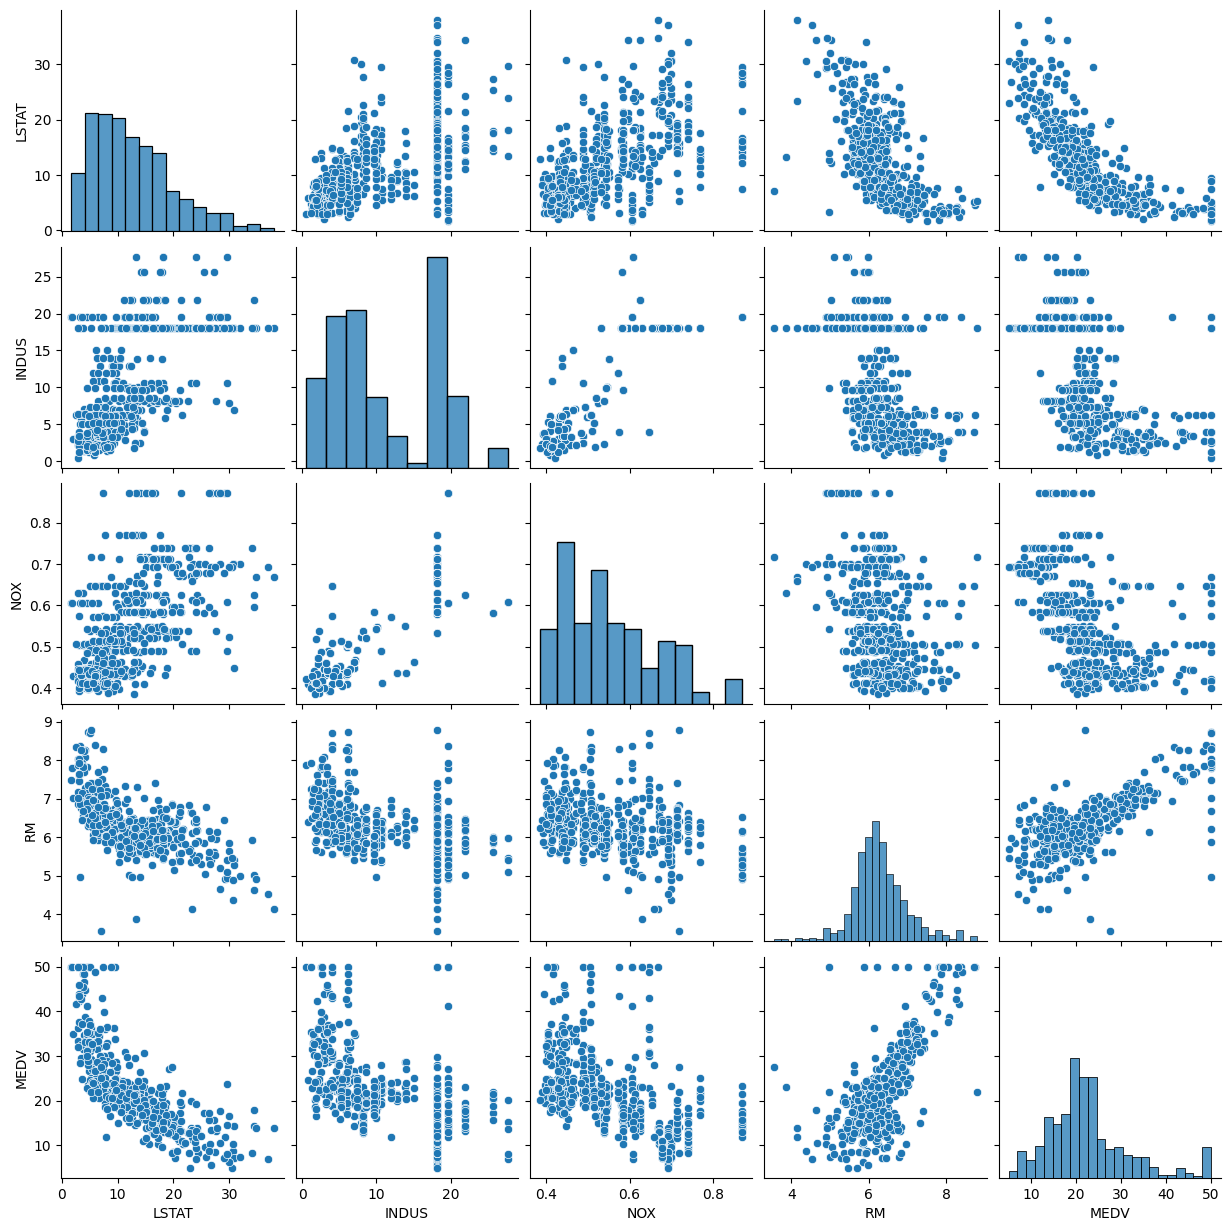

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting features to visualize
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# Generate correlation matrix
correlation_matrix = df[cols].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# Generate pairplot to plot both histogram and scatter plot
sns.pairplot(data=df, x_vars=cols, y_vars=cols)
plt.show()

# Select LSTAT and MEDV as X and y, respectively
X = df[['LSTAT']].values # nonlinear relationship features with y
y = df['MEDV'].values

### Use LinearRegression without transforming the features



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regr = LinearRegression() # Create an instance of a linear regression model

regr.fit(X, y) # Train the linear regression model

linear_mse = mean_squared_error(y, regr.predict(X)) # calculate the mean square error

print('MSE: %.3f' % linear_mse)

MSE: 38.483


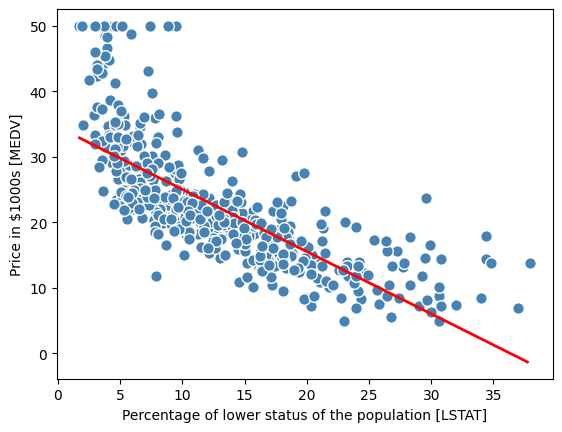

In [ ]:
import numpy as np

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis] # Create a range of custom test input value based on value in X
y_lin_fit = regr.predict(X_fit) # Use the trained regression model to predict X_fit

plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X_fit, y_lin_fit, color='red', lw=2) # make prediction
plt.xlabel('Percentage of lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### Polynomial regression (Quadratic)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()

# Generate polynomial features
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X) # generates a new set of features by transforming the input data X into a quadratic feature space

regr.fit(X_quad, y)
quad_mse = mean_squared_error(y, regr.predict(X_quad))
print('MSE: %.3f' % quad_mse)

MSE: 30.331


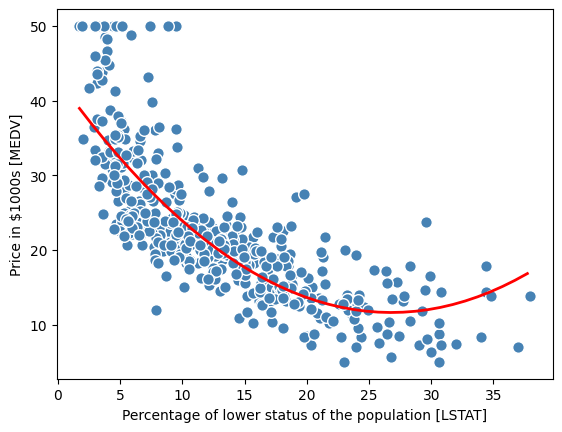

In [ ]:
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X_fit, y_quad_fit, color='red', lw=2) # make prediction
plt.xlabel('Percentage of lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### Polynomial regression (Cubic)

In [ ]:
cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X)

regr.fit(X_cubic, y)

cubic_mse = mean_squared_error(y, regr.predict(X_cubic))
print('MSE: %.3f' % cubic_mse)

MSE: 28.884


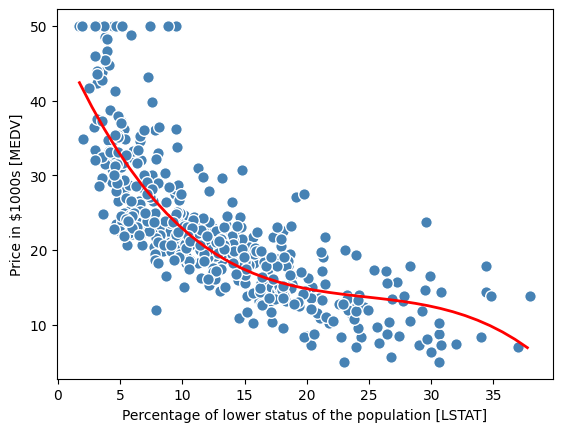

In [ ]:
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X_fit, y_cubic_fit, color='red', lw=2) # make prediction
plt.xlabel('Percentage of lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### Overall comparison


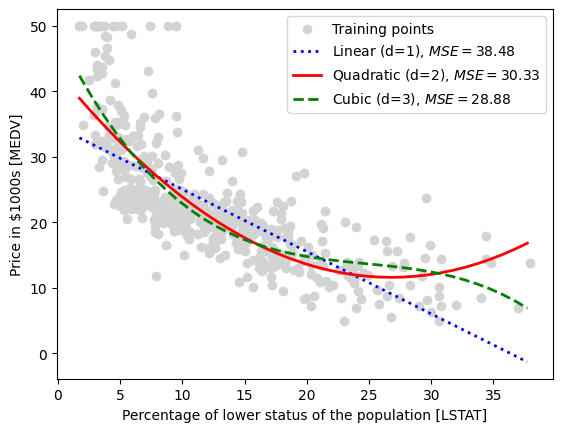

In [ ]:
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='Linear (d=1), $MSE=%.2f$' % linear_mse, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='Quadratic (d=2), $MSE=%.2f$' % quad_mse, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='Cubic (d=3), $MSE=%.2f$' % cubic_mse, color='green', lw=2, linestyle='--')
plt.xlabel('Percentage of lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

### Multiple independent variables

In [ ]:
# Select RM and MEDV as X and y, respectively
X_multi = df[['RM', 'LSTAT' ]].values
y = df['MEDV'].values

regr = LinearRegression()
regr.fit(X_multi, y)

linear_multi_mse = mean_squared_error(y, regr.predict(X_multi))
print('MSE: %.3f' % linear_multi_mse)

MSE: 30.512


### 3D visualization of the multiple independent variables

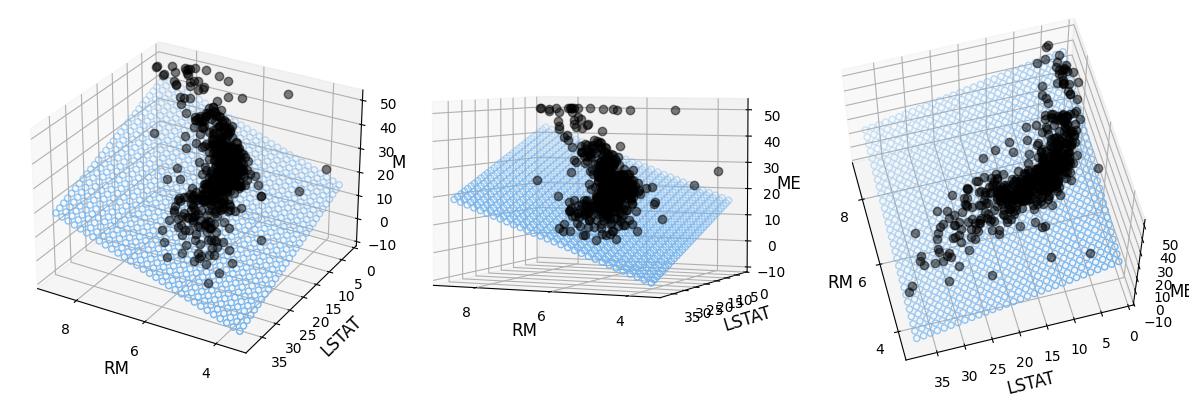

In [ ]:
# Data points for visualization
x_axis = X_multi[:, 0] # select all the values from the first column (index 0) of X_multi
y_axis = X_multi[:, 1]
z_axis = y

# Create coordinate matrices for x and y
x_pred = np.linspace(x_axis.min(), x_axis.max(), 30)
y_pred = np.linspace(y_axis.min(), y_axis.max(), 30)

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred) # create meshgrid of points
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

z_pred = regr.predict(model_viz)


fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
  ax.plot(x_axis, y_axis, z_axis, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
  ax.scatter(xx_pred.flatten(), yy_pred.flatten(), z_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
  ax.set_xlabel('RM', fontsize=12)
  ax.set_ylabel('LSTAT', fontsize=12)
  ax.set_zlabel('MEDV', fontsize=12)
  ax.locator_params(nbins=4, axis='x')
  ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

## Ex 1. Quadratic(degree=2), MSE = 20.492

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()

# Select RM and MEDV as X and y, respectively
X_multi = df[['RM', 'LSTAT' ]].values
y = df['MEDV'].values

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_multi)

regr.fit(X_quad, y)
quad_mse = mean_squared_error(y, regr.predict(X_quad))
print('MSE: %.3f' % quad_mse)

MSE: 20.492


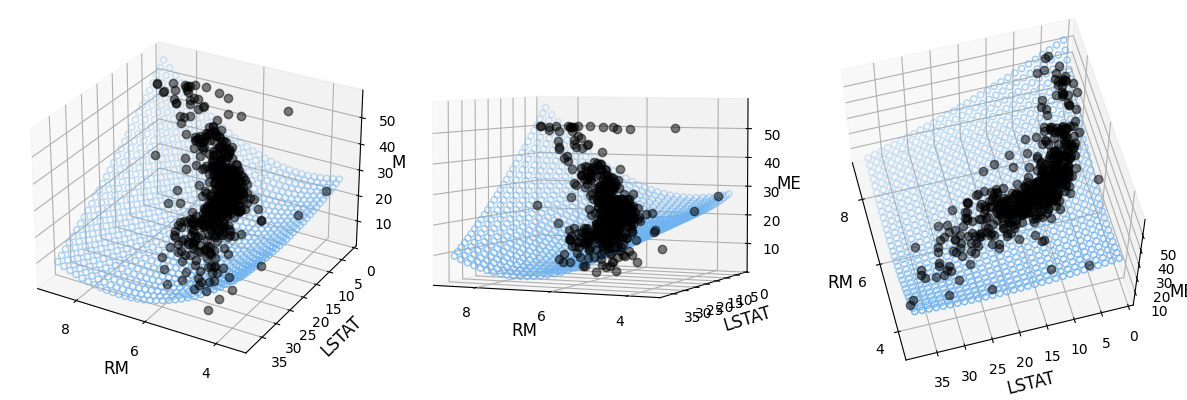

In [ ]:
# Data points for visualization
x_axis = X_multi[:, 0] # select all the values from the first column (index 0) of X_multi
y_axis = X_multi[:, 1]
z_axis = y

# Create coordinate matrices for x and y
x_pred = np.linspace(x_axis.min(), x_axis.max(), 30)
y_pred = np.linspace(y_axis.min(), y_axis.max(), 30)

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred) # create meshgrid of points
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
model_viz = quadratic.fit_transform(model_viz)

z_pred = regr.predict(model_viz)


fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
  ax.plot(x_axis, y_axis, z_axis, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
  ax.scatter(xx_pred.flatten(), yy_pred.flatten(), z_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
  ax.set_xlabel('RM', fontsize=12)
  ax.set_ylabel('LSTAT', fontsize=12)
  ax.set_zlabel('MEDV', fontsize=12)
  ax.locator_params(nbins=4, axis='x')
  ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

## Ex 2. Quartic(degree=4), MSE = 17.530

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()

# Select RM and MEDV as X and y, respectively
X_multi = df[['RM', 'LSTAT' ]].values
y = df['MEDV'].values

quartic = PolynomialFeatures(degree=4)
X_quar = quartic.fit_transform(X_multi)

regr.fit(X_quar, y)
quar_mse = mean_squared_error(y, regr.predict(X_quar))
print('MSE: %.3f' % quar_mse)

MSE: 17.530


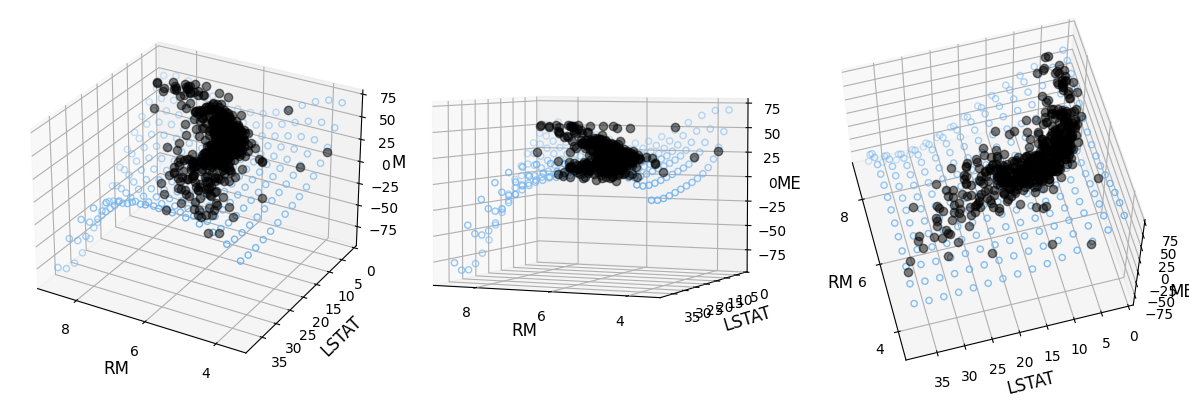

In [ ]:
# Data points for visualization
x_axis = X_multi[:, 0] # select all the values from the first column (index 0) of X_multi
y_axis = X_multi[:, 1]
z_axis = y

# Create coordinate matrices for x and y
x_pred = np.linspace(x_axis.min(), x_axis.max(), 15)
y_pred = np.linspace(y_axis.min(), y_axis.max(), 15)

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred) # create meshgrid of points
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
model_viz = quartic.fit_transform(model_viz)

z_pred = regr.predict(model_viz)


fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
  ax.plot(x_axis, y_axis, z_axis, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
  ax.scatter(xx_pred.flatten(), yy_pred.flatten(), z_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
  ax.set_xlabel('RM', fontsize=12)
  ax.set_ylabel('LSTAT', fontsize=12)
  ax.set_zlabel('MEDV', fontsize=12)
  ax.locator_params(nbins=4, axis='x')
  ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

😎